In [ ]:
#importing necessary libraries and modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#creating the datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
#checking the shape
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_train.dtype)
print(y_train[0])

(60000,)
(60000, 28, 28)
(10000,)
(10000, 28, 28)
uint8
9


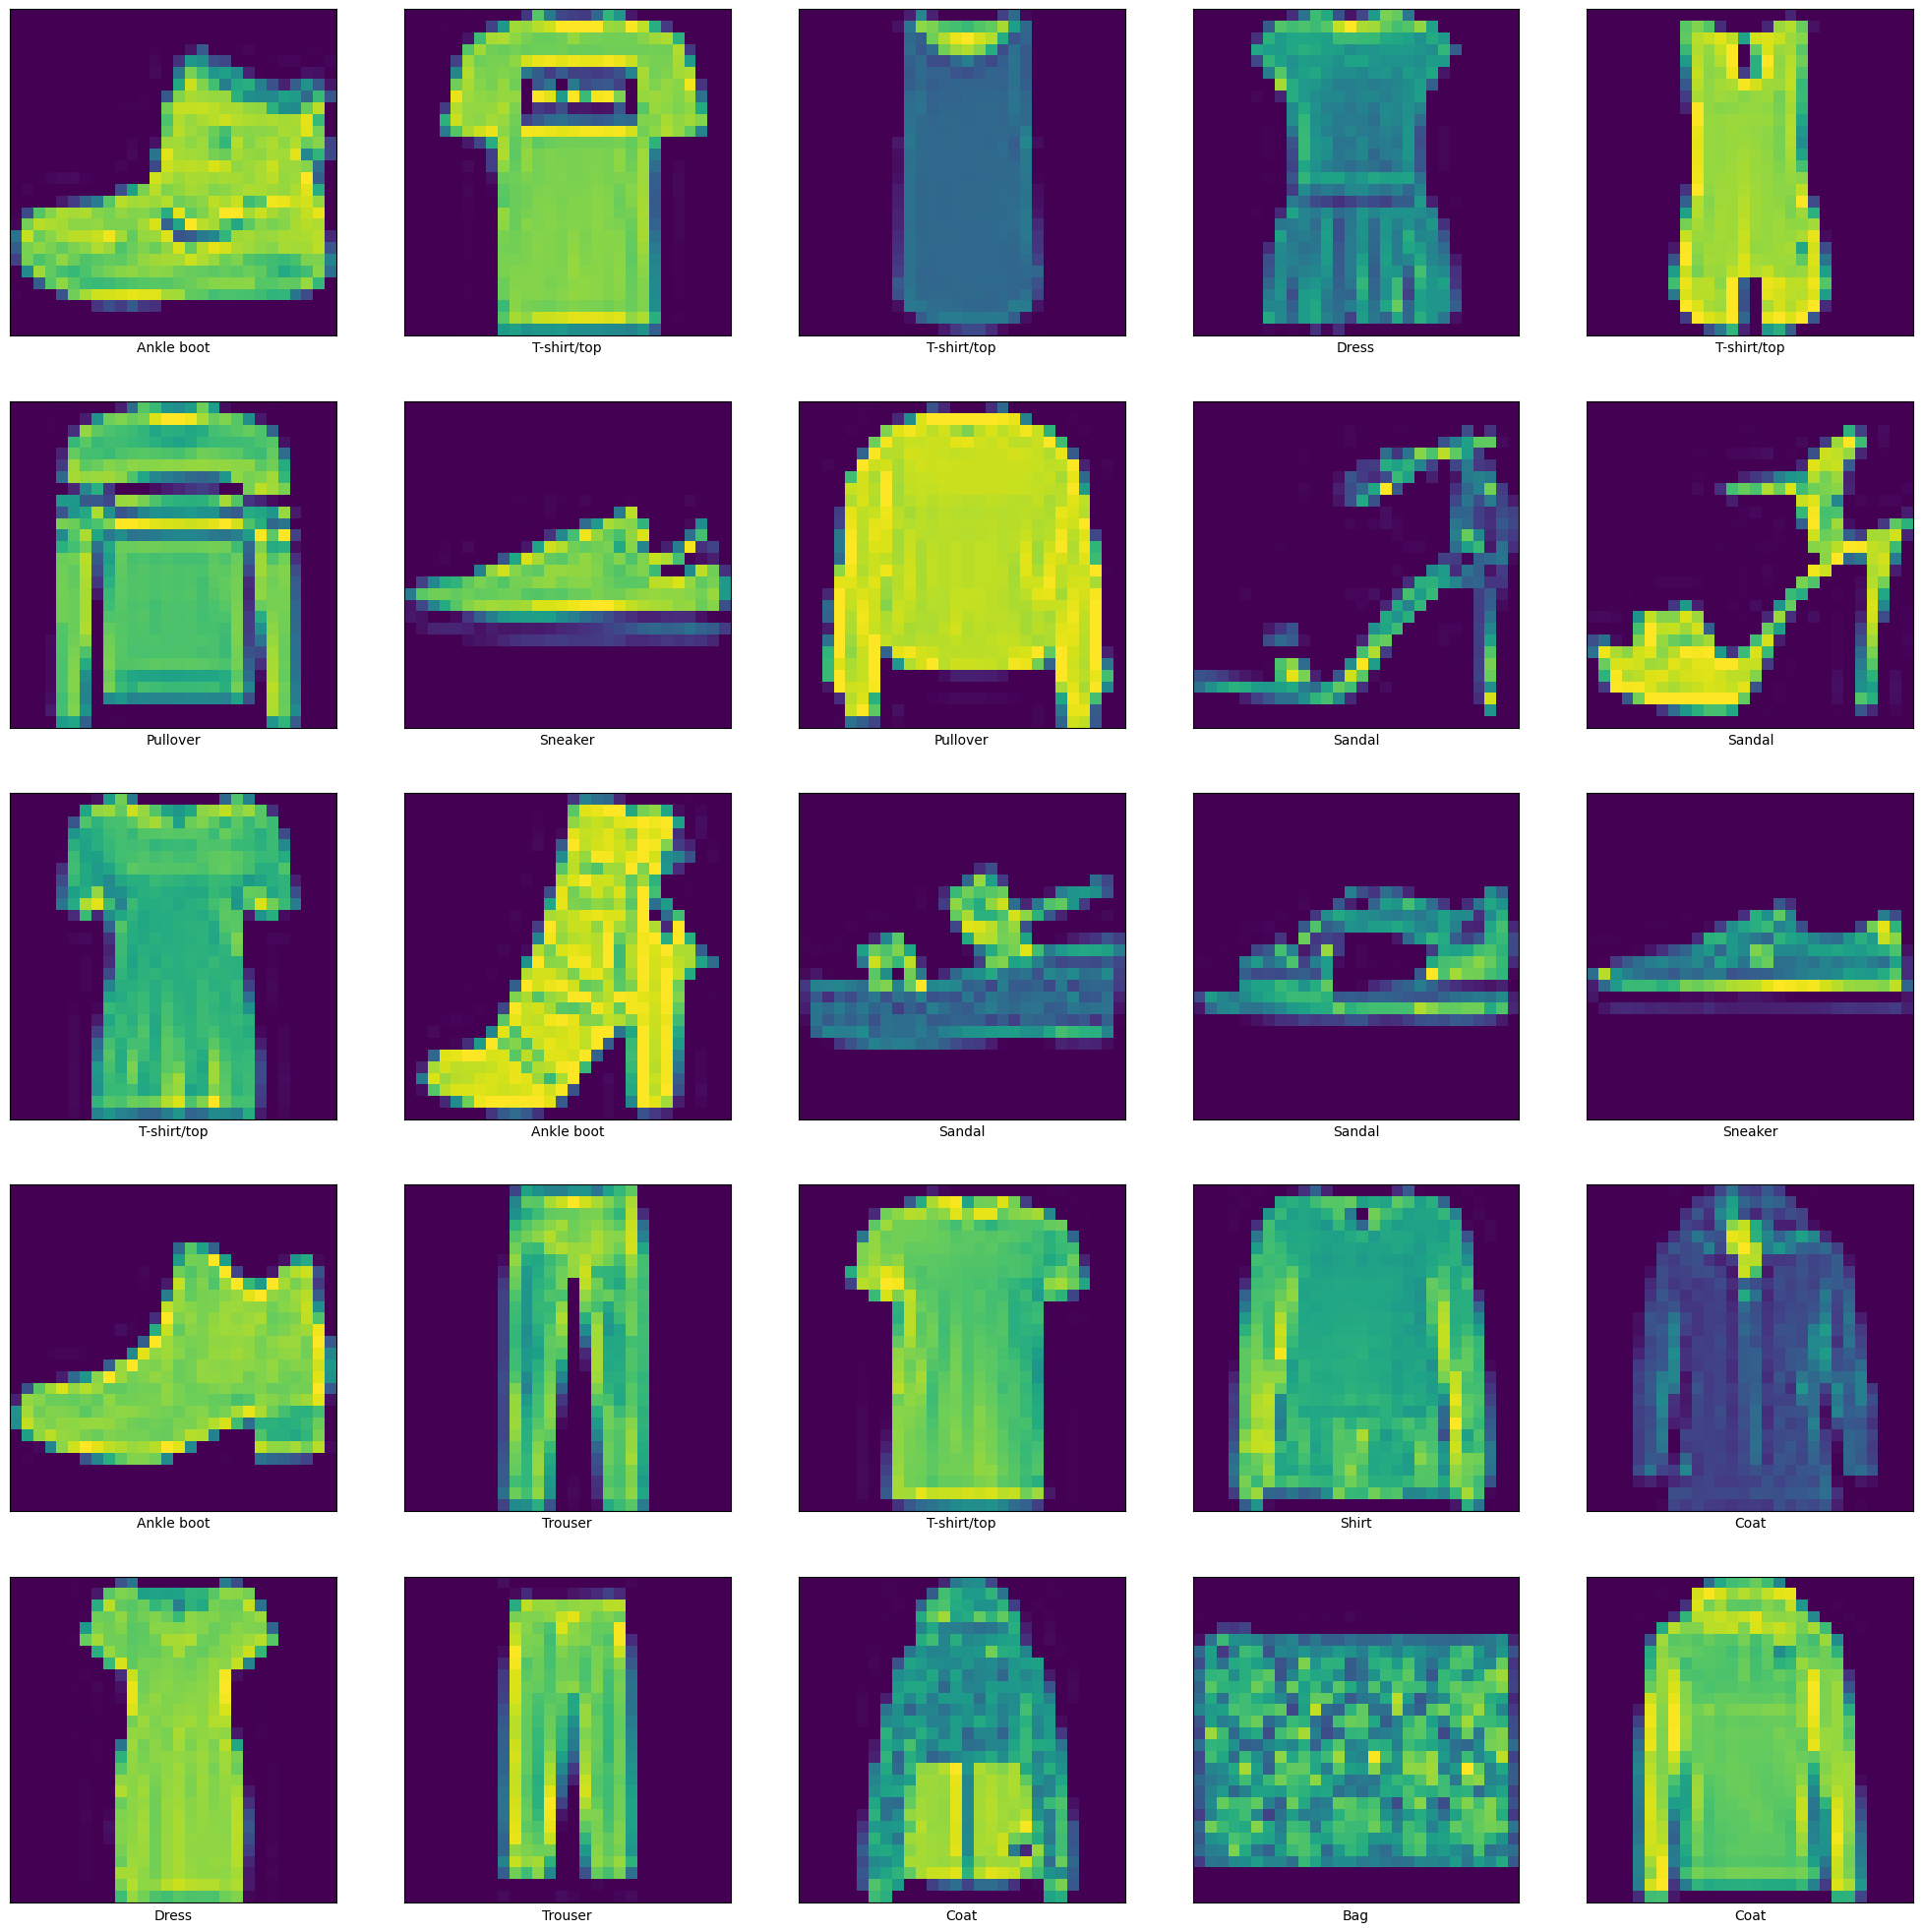

In [ ]:
#displaying the contents
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:
#conversion necessary for neural network creation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
#creation of neural network
model = models.Sequential()
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compiling the neural network we created
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
